In [7]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statistics as stats

In [8]:
xls = pd.ExcelFile('pain_data_main.xlsx')
everyone_df = pd.read_excel(xls, 'Surgical Registry EVERYONE')
everyone_df.set_index('PatientID', inplace = True)

In [9]:
everyone_df

,"GroupingInclusions (1 include, 2 exclude)","Genetics (1 yes, 2=NO)",PatientGender,PatientAge,PatientWeight,PatientRace,"WhatSurgery (1=Nuss, 2= Spine, 3=other)",Haller Index (999= not applicable),Risser,"Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)",...,Hrs73_84TMorphEquiv,Hrs85_96TMorphEquiv,Hrs97_108TMorphEquiv,Hrs109_120TMorphEquiv,Hrs121_132TMorphEquiv,Hrs133_144TMorphEquiv,Hrs145_156TMorphEquiv,Hrs157_168TMorphEquiv,Hrs169_180TMorphEquiv,Hrs181_195TMorphEquiv
PatientID,,,,,,,,,,,,,,,,,,,,,
501,1,1,1,194,65.0,1,1,3.90,999.0,999,...,3.867600,4.484367,2.017467,1.950767,1.817367,1.483867,0.833333,0.833333,1.041667,1.041667
502,1,1,1,179,57.0,1,1,3.86,999.0,999,...,3.959000,2.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,1,1,1,185,68.0,1,1,3.90,999.0,999,...,1.666667,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,1,1,2,137,63.0,1,2,999.00,777.0,11,...,3.468400,3.684967,0.416667,0.833333,0.416667,0.416667,NaN,NaN,NaN,NaN
505,1,1,1,180,66.0,1,1,3.10,999.0,999,...,4.168500,9.503667,1.458333,1.250000,NaN,NaN,NaN,NaN,NaN,NaN
507,1,1,1,167,55.0,1,1,5.90,999.0,999,...,3.783667,1.666667,5.300000,2.000000,0.000000,2.000000,NaN,NaN,NaN,NaN
508,1,1,1,234,57.7,1,2,999.00,5.0,10,...,0.416667,0.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,1,1,2,158,40.0,1,2,999.00,777.0,11,...,0.416667,0.416667,0.208333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,1,1,2,177,58.0,1,2,999.00,4.0,11,...,1.625000,0.625000,0.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Drop selected patients.
everyone_df.drop([513,515,544,547],0, inplace = True)

everyone_df.drop(columns = 'Avg72hourMax', inplace = True)

In [11]:
# Split into two dataframes.
# Haller for chest surgeries and Risser for spine surgeries
chest_df = everyone_df[everyone_df['Haller Index (999= not applicable)'] != 999]
spine_df = everyone_df[everyone_df['Risser'] != 999]
print(spine_df.shape,chest_df.shape)

(42, 114) (24, 114)


In [12]:
# Impute missing value for patient 534
spine_df.at[534,'Risser'] = 777
spine_df.at[534, 'Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)'] = stats.median(spine_df['Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)'])
spine_df.at[534, 'Bottom level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)'] = stats.median(spine_df['Bottom level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)'])
spine_df.at[534, '# of levels'] = stats.median(spine_df['# of levels'])
spine_df.at[534, 'Shape (1=Rt-left S, 2=left-right, 3= kyphosis; 999=not applicable)'] = stats.median(spine_df['Shape (1=Rt-left S, 2=left-right, 3= kyphosis; 999=not applicable)'])
spine_df.at[534, 'Top degree '] = stats.median(spine_df['Top degree '])
spine_df.at[534, 'Bottom degree'] = stats.median(spine_df['Bottom degree'])

In [13]:
spine_df.loc[[534]]

,"GroupingInclusions (1 include, 2 exclude)","Genetics (1 yes, 2=NO)",PatientGender,PatientAge,PatientWeight,PatientRace,"WhatSurgery (1=Nuss, 2= Spine, 3=other)",Haller Index (999= not applicable),Risser,"Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)",...,Hrs73_84TMorphEquiv,Hrs85_96TMorphEquiv,Hrs97_108TMorphEquiv,Hrs109_120TMorphEquiv,Hrs121_132TMorphEquiv,Hrs133_144TMorphEquiv,Hrs145_156TMorphEquiv,Hrs157_168TMorphEquiv,Hrs169_180TMorphEquiv,Hrs181_195TMorphEquiv
PatientID,,,,,,,,,,,,,,,,,,,,,
534,2,1,1,275,50.4,1,2,999.0,777.0,11,...,0.741933,7.086667,0.833333,0.208333,0.833333,0.208333,NaN,NaN,NaN,NaN


# Trends Shown

* Surgical Location Trends
* Timeline of discharge dates and discharge numbers
* On average how many days in there

In [25]:
# Surgical Location Trends



PatientID
504    2014-03-27 00:00:00
508    2014-05-23 00:00:00
509    2014-06-28 00:00:00
510    2014-07-08 00:00:00
511    2014-02-05 00:00:00
512    2014-06-07 00:00:00
514    2014-06-14 00:00:00
516    2014-07-19 00:00:00
517    2014-07-05 00:00:00
519    2014-07-06 00:00:00
Name: DischargeDate, dtype: object

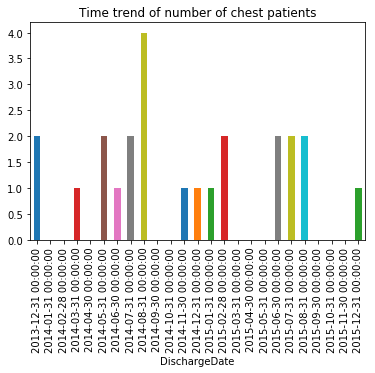

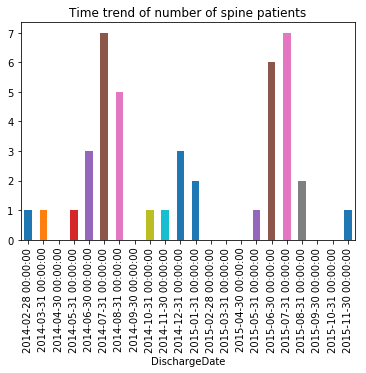

In [14]:
# Timeline of discharge dates and discharge numbers

chest_df1 = chest_df.reset_index()
chest_df1.set_index('DischargeDate', inplace = True)
chest_df1 = chest_df1.groupby(pd.Grouper(freq = 'M')).count()
chest_df1.reset_index(inplace = True)
chest_df1.plot(x = 'DischargeDate', y = 'PatientID', kind = 'bar', legend = False, title = 'Time trend of number of chest patients')


spine_df1 = spine_df.reset_index()
spine_df1.set_index('DischargeDate', inplace = True)
spine_df1 = spine_df1.groupby(pd.Grouper(freq = 'M')).count()
spine_df1.reset_index(inplace = True)
spine_df1.plot(x = 'DischargeDate', y = 'PatientID', kind = 'bar', legend = False, title = 'Time trend of number of spine patients')

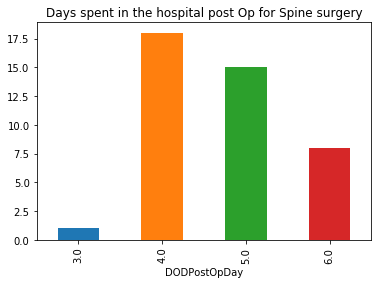

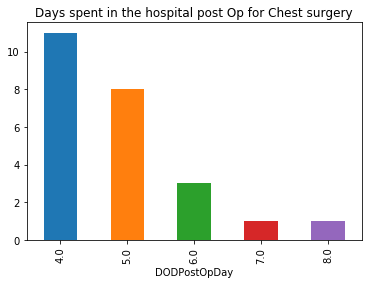

In [15]:
# On average how many days inpatient
spine_df2 = spine_df.reset_index()
spine_df2 = spine_df2.groupby('DODPostOpDay',as_index = False).count()
spine_df2.plot(x = 'DODPostOpDay', y = 'PatientID', kind = 'bar', legend = False, title = 'Days spent in the hospital post Op for Spine surgery')

chest_df2 = chest_df.reset_index()
chest_df2 = chest_df2.groupby('DODPostOpDay',as_index = False).count()
chest_df2.plot(x = 'DODPostOpDay', y = 'PatientID', kind = 'bar', legend = False, title = 'Days spent in the hospital post Op for Chest surgery')